In [0]:
from pandas import read_csv
from collections import Counter
from numpy import round
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [15]:
data = read_csv('breast-cancer.csv')
#data.describe()
#data.dtypes
#X = data.select_dtypes(['float64'])
#Y = data.select_dtypes(['object'])
columns1 = data.columns
print(columns1)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [0]:
listc = ['id','diagnosis','Unnamed: 32']
X = data.drop(listc,axis=1)

In [0]:
Y = data.diagnosis

In [0]:
lc = LabelEncoder()
Y = lc.fit_transform(Y)


In [0]:
X = StandardScaler().fit_transform(X)

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.2,random_state=0)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(455, 30)
(455,)
(114, 30)
(114,)


In [21]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('QDA',QuadraticDiscriminantAnalysis()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RFC',RandomForestClassifier(n_estimators=100,criterion='entropy',
                                           random_state=0)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = RepeatedStratifiedKFold(n_repeats=2,n_splits=10, random_state=1)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.980193 (0.016858)
LDA: 0.950652 (0.027425)
KNN: 0.963671 (0.023444)
CART: 0.918792 (0.043731)
NB: 0.941763 (0.038959)
QDA: 0.961522 (0.025827)
SVM: 0.977971 (0.018479)
RFC: 0.956087 (0.025891)


In [22]:
model = LogisticRegression(solver='liblinear',multi_class='ovr')
model.fit(X_train,Y_train)
scores = model.predict(X_test)
acc = accuracy_score(Y_test,scores)
print(acc)

0.9649122807017544


Epoch 1/150
15/15 [==============================] - 0s 8ms/step - loss: 0.7765 - accuracy: 0.5516
Epoch 2/150
15/15 [==============================] - 0s 7ms/step - loss: 0.5620 - accuracy: 0.7143
Epoch 3/150
15/15 [==============================] - 0s 7ms/step - loss: 0.4506 - accuracy: 0.7912
Epoch 4/150
15/15 [==============================] - 0s 6ms/step - loss: 0.4168 - accuracy: 0.8198
Epoch 5/150
15/15 [==============================] - 0s 6ms/step - loss: 0.3595 - accuracy: 0.8286
Epoch 6/150
15/15 [==============================] - 0s 6ms/step - loss: 0.3105 - accuracy: 0.8813
Epoch 7/150
15/15 [==============================] - 0s 6ms/step - loss: 0.2841 - accuracy: 0.8747
Epoch 8/150
15/15 [==============================] - 0s 6ms/step - loss: 0.2262 - accuracy: 0.9187
Epoch 9/150
15/15 [==============================] - 0s 6ms/step - loss: 0.2339 - accuracy: 0.9121
Epoch 10/150
15/15 [==============================] - 0s 6ms/step - loss: 0.2322 - accuracy: 0.8967
Epoch 11/

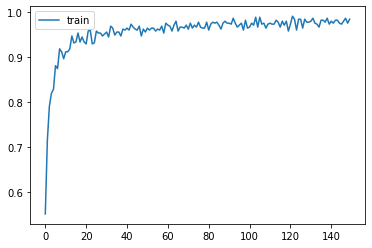

In [23]:
import tensorflow as tf
from matplotlib import pyplot
model = tf.keras.models.Sequential([
                                   tf.keras.layers.Dense(units=1024,activation='relu'),
                                   tf.keras.layers.Dropout(.3),
                                   tf.keras.layers.BatchNormalization(),
                                   tf.keras.layers.Dense(units=1024,activation='relu'),
                                   tf.keras.layers.Dropout(.3),
                                   tf.keras.layers.BatchNormalization(),
                                   tf.keras.layers.Dense(units=256,activation='relu'),
                                   tf.keras.layers.Dropout(.2),
                                   tf.keras.layers.BatchNormalization(),
                                  
                                   tf.keras.layers.Dense(units=1,activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001,momentum=0.1),loss='binary_crossentropy',metrics=['accuracy'])
	# fit model
history = model.fit(X_train,Y_train, epochs=150,steps_per_epoch=15)
	# plot learning curves
pyplot.plot(history.history['accuracy'], label='train')
pyplot.legend()


In [24]:
scores = model.predict(X_test)
rs=[]
for index,i in enumerate(scores):
  if i >0.5:
    scores[index]=1
  else:
    scores[index]=0

acc = accuracy_score(Y_test,scores)
print(acc)

0.9736842105263158


# ***Visualizing the Data***

In [25]:
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import time
from subprocess import check_output

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


37.0% are Malignant and 63.0% are Benign


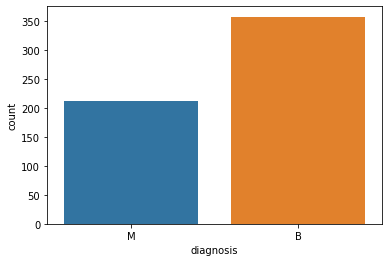

In [26]:
y = data.diagnosis
x = data.drop(listc,axis=1)
ax = sns.countplot(y,label='Count')
B,M = y.value_counts()
print('{}% are Malignant and {}% are Benign'.format(round(M/(M+B)*100),round(B/(M+B)*100)))

In [27]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

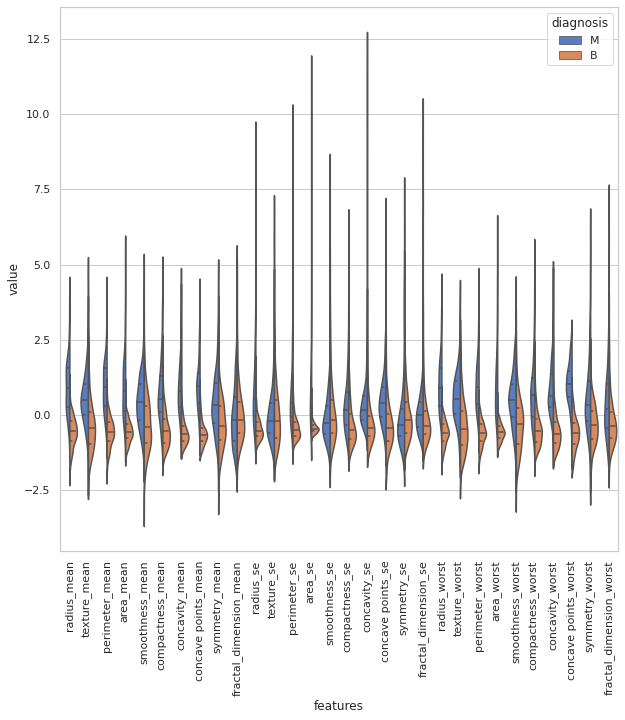

In [94]:
import pandas as pd
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:30]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

In [29]:
print(data)

     diagnosis                features     value
0            M             radius_mean  1.096100
1            M             radius_mean  1.828212
2            M             radius_mean  1.578499
3            M             radius_mean -0.768233
4            M             radius_mean  1.748758
...        ...                     ...       ...
5685         M  fractal_dimension_mean -0.930209
5686         M  fractal_dimension_mean -1.057681
5687         M  fractal_dimension_mean -0.894800
5688         M  fractal_dimension_mean  1.042778
5689         B  fractal_dimension_mean -0.560539

[5690 rows x 3 columns]


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

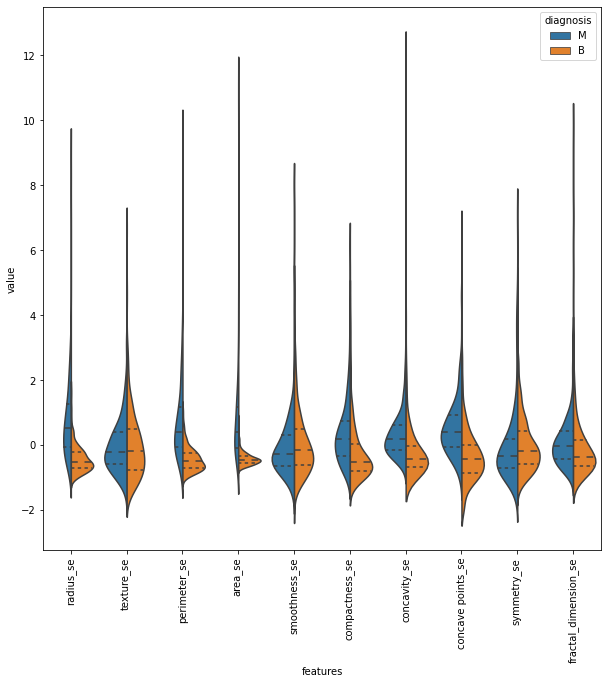

In [30]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

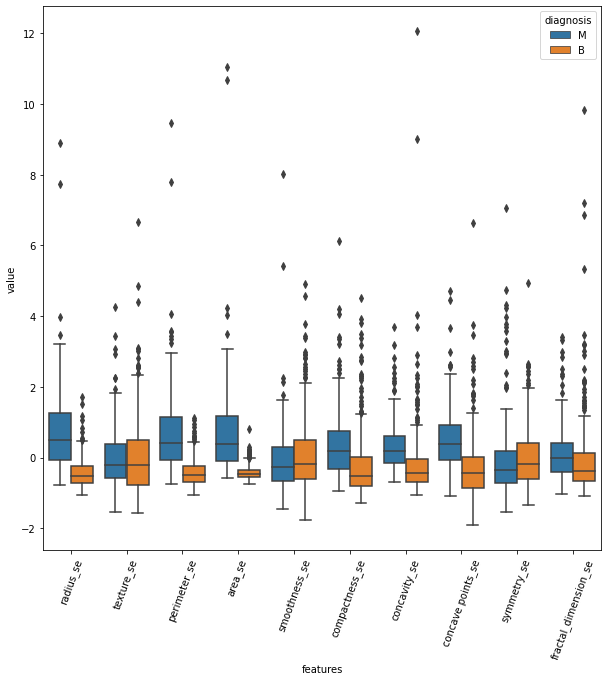

In [31]:
plt.figure(figsize=(10,10))
sns.boxplot(x='features',y='value',hue='diagnosis',data=data)
plt.xticks(rotation=70)

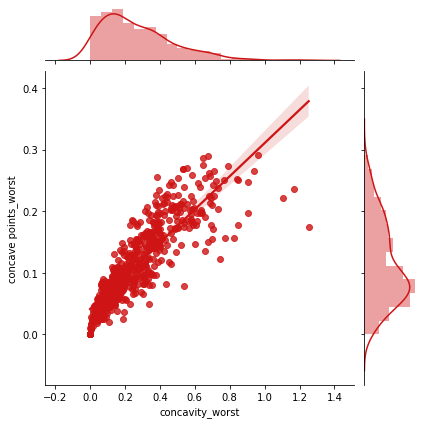

In [32]:
sns.jointplot(x.loc[:,'concavity_worst'],
              x.loc[:,'concave points_worst'], 
              kind="reg",
              color="#ce1414",)


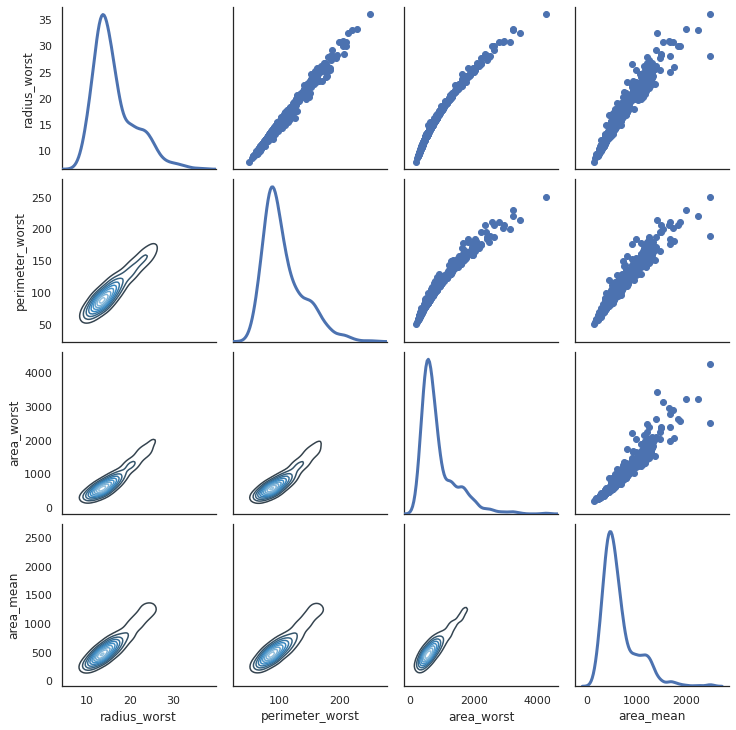

In [33]:
sns.set(style='white')
df = x.loc[:,['radius_worst','perimeter_worst','area_worst','area_mean']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

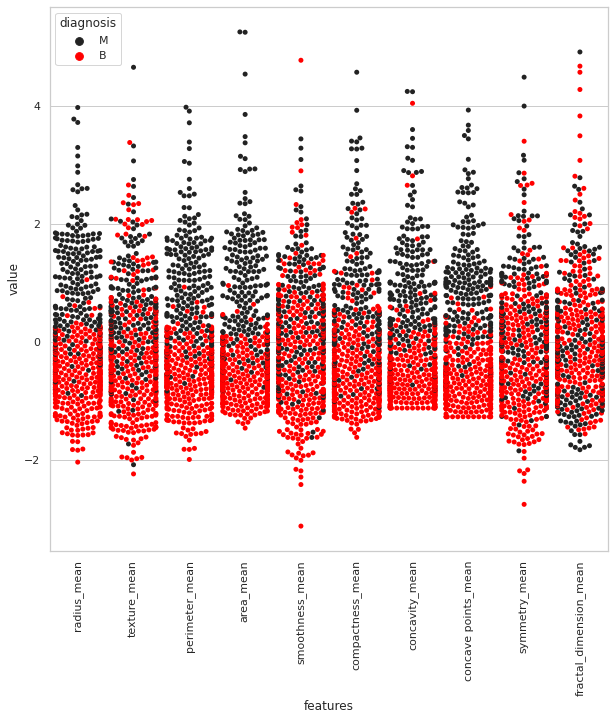

In [92]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data,color='red')

plt.xticks(rotation=90)

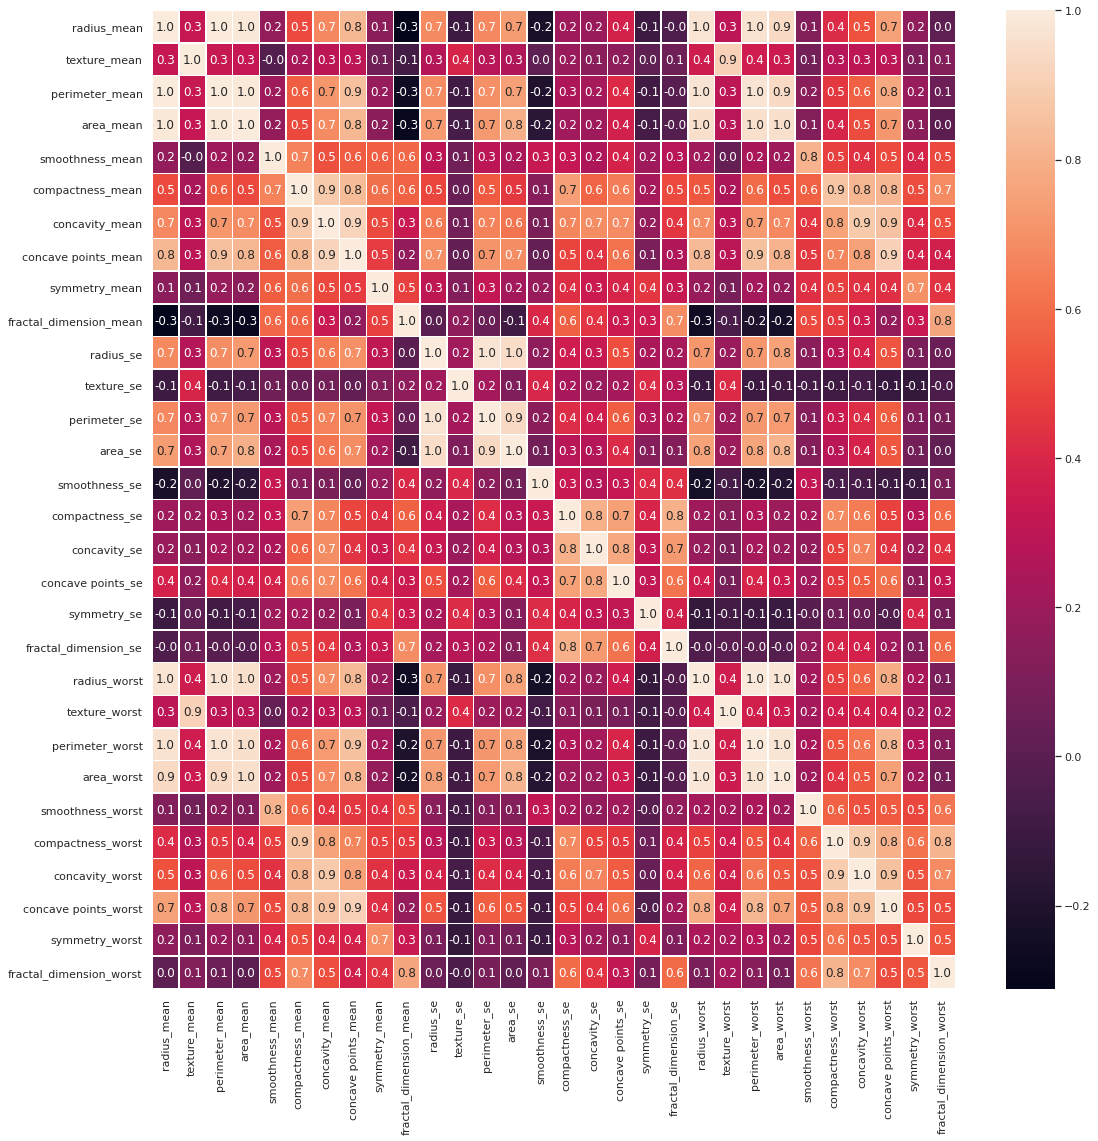

In [35]:
_,_ = plt.subplots(figsize=(18, 18))
#print(ax)
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f')#,ax=ax)

In [36]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


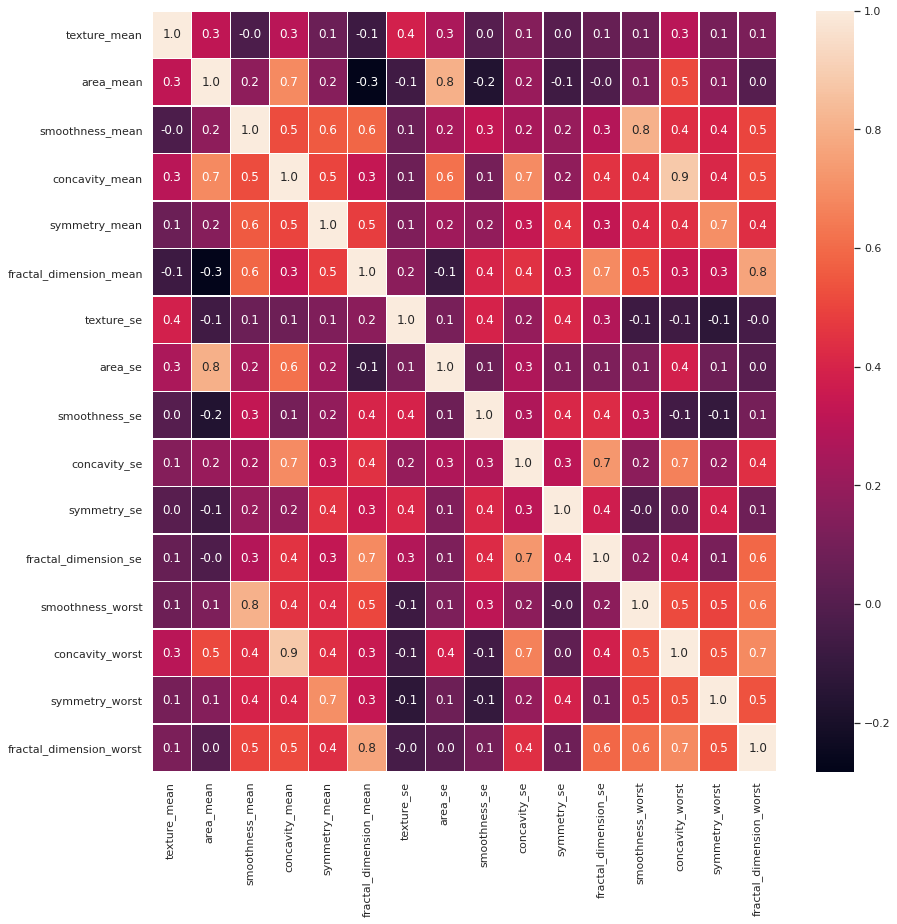

In [37]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


In [123]:
x_1 = StandardScaler().fit_transform(x_1)
x_train, x_test, y_train, y_test = train_test_split(x_1, Y, test_size=0.25, random_state=42)
print(x_1)

[[-2.07333501  0.9843749   1.56846633 ...  2.10952635  2.75062224
   1.93701461]
 [-0.35363241  1.90870825 -0.82696245 ... -0.14674897 -0.24388967
   0.28118999]
 [ 0.45618695  1.55888363  0.94221044 ...  0.85497394  1.152255
   0.20139121]
 ...
 [ 2.0455738   0.57795264 -0.84048388 ...  0.3267666  -1.10454895
  -0.31840916]
 [ 2.33645719  1.73521799  1.52576706 ...  3.19760468  1.91908301
   2.21963528]
 [ 1.22179204 -1.34778924 -3.11208479 ... -1.30583065 -0.04813821
  -0.75120669]]


Epoch 1/100
15/15 [==============================] - 0s 19ms/step - loss: 0.4781 - accuracy: 0.7465 - val_loss: 0.4146 - val_accuracy: 0.9510
Epoch 2/100
15/15 [==============================] - 0s 10ms/step - loss: 0.2424 - accuracy: 0.8920 - val_loss: 0.2953 - val_accuracy: 0.9580
Epoch 3/100
15/15 [==============================] - 0s 8ms/step - loss: 0.1887 - accuracy: 0.9272 - val_loss: 0.2486 - val_accuracy: 0.9580
Epoch 4/100
15/15 [==============================] - 0s 8ms/step - loss: 0.1808 - accuracy: 0.9272 - val_loss: 0.2222 - val_accuracy: 0.9510
Epoch 5/100
15/15 [==============================] - 0s 10ms/step - loss: 0.1531 - accuracy: 0.9413 - val_loss: 0.2124 - val_accuracy: 0.9441
Epoch 6/100
15/15 [==============================] - 0s 8ms/step - loss: 0.1454 - accuracy: 0.9366 - val_loss: 0.2029 - val_accuracy: 0.9441
Epoch 7/100
15/15 [==============================] - 0s 8ms/step - loss: 0.1263 - accuracy: 0.9531 - val_loss: 0.1903 - val_accuracy: 0.9371
Epoch 8/10

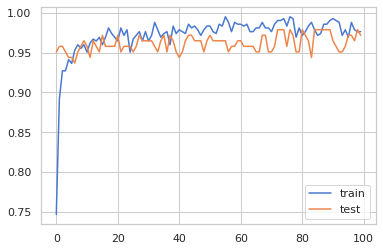

In [124]:
model = tf.keras.models.Sequential([
                                   tf.keras.layers.Dense(units=1024,activation='relu'),
                                   tf.keras.layers.Dropout(.5),
                                   tf.keras.layers.BatchNormalization(),
                                   tf.keras.layers.Dense(units=512,activation='relu'),
                                   tf.keras.layers.Dropout(.6),
                                   tf.keras.layers.BatchNormalization(),
                                   tf.keras.layers.Dense(units=256,activation='relu'),
                                   tf.keras.layers.Dropout(.6),
                                   tf.keras.layers.BatchNormalization(),
                                  
                                   tf.keras.layers.Dense(units=1,activation='sigmoid')
])
lrs = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch/20)
)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss='binary_crossentropy',metrics=['accuracy'])
	# fit model
history = model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=100,steps_per_epoch=15)
                    #callbacks =[lrs])
	# plot learning curves
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

#plt.semilogx(history.history['lr'],history.history['loss'])
#plt.axis([1e-8,1e-4,0,3])


In [125]:
scores = model.predict(x_test)
rs=[]
for index,i in enumerate(scores):
  if i >0.5:
    scores[index]=1
  else:
    scores[index]=0

acc = accuracy_score(y_test,scores)
print(acc)
print("mean acc:",np.mean(history.history['val_accuracy']))
print(classification_report(y_test,scores))
print(confusion_matrix(y_test,scores))

0.972027972027972
mean acc: 0.9619580399990082
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        89
           1       0.98      0.94      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

[[88  1]
 [ 3 51]]


In [126]:
model = LogisticRegression(penalty='l2',tol=0.001,max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.001, verbose=0,
                   warm_start=False)

In [127]:
scores = model.predict(x_test)
acc = accuracy_score(y_test,scores)

print(acc)
print(classification_report(y_test,scores))
print(confusion_matrix(y_test,scores))

0.9790209790209791
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        89
           1       0.96      0.98      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

[[87  2]
 [ 1 53]]
